In [593]:
# working with dataframes
import pandas as pd
import numpy as np

# using spaCy to compare similarities in sentences
import spacy

# removing connecting words:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# visualizations
import seaborn as sns                  # visualization (based on matplotlib)
import matplotlib.pyplot as plt        # visualization
from matplotlib.pyplot import figure

# math operations (e.g. isnan())
import math
import statistics

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anjawu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anjawu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK resources used:   
https://www.nltk.org/install.html   
https://stackoverflow.com/questions/65199011/is-there-a-way-to-check-similarity-between-two-full-sentences-in-python   
https://www.programiz.com/python-programming/methods/string/lower   
https://betterprogramming.pub/the-beginners-guide-to-similarity-matching-using-spacy-782fc2922f7c   
https://stackabuse.com/removing-stop-words-from-strings-in-python/#usingpythonsnltklibrary    
https://www.nltk.org/api/nltk.tokenize.html


# Data collection and combination

In [139]:
# import all of costco coupons unedited
costco_nov8 = pd.read_csv('CSVs/costco/costco-couponsNov8.csv')
costco_feb28 = pd.read_csv('CSVs/costco/costco-couponsFeb28.csv')
costco_may30 = pd.read_csv('CSVs/costco/costco-couponsMay30.csv')

# import all of costco coupons edited by hand to make new column for just brands
strip_costco_nov8 = pd.read_csv('CSVs/costco/editted/strippedbrand-costco-couponsNov8.csv')
strip_costco_feb28 = pd.read_csv('CSVs/costco/editted/strippedbrand-costco-couponsFeb28.csv')
strip_costco_may30 = pd.read_csv('CSVs/costco/editted/strippedbrand-costco-couponsMay30.csv')

# import all of real-canadian superstore matches to costco coupons unedited
rcs_costco_nov8 = pd.read_csv('CSVs/rcss_costco_Nov8.csv')
rcs_costco_feb28 = pd.read_csv('CSVs/rcss_costco_Feb28.csv')
rcs_costco_may30 = pd.read_csv('CSVs/rcss_costco_May30.csv')

# import all of real-canadian superstore matches to costco coupons from edited version of costco csv
strip_rcs_costco_nov8 = pd.read_csv('CSVs/strippedbrand-rcss_costco_Nov8.csv')
strip_rcs_costco_feb28 = pd.read_csv('CSVs/strippedbrand-rcss_costco_Feb28.csv')
strip_rcs_costco_may30 = pd.read_csv('CSVs/strippedbrand-rcss_costco_May30.csv')

### Combining and Cleaning DataFrames

In [140]:
# creating one df for each of the four sections above to combine dates into one
costco_frames = [costco_nov8, costco_feb28, costco_may30]
costco = pd.concat(costco_frames)

strip_costco_frames = [strip_costco_nov8, strip_costco_feb28, strip_costco_may30]
stripped_costco = pd.concat(strip_costco_frames)

rcs_costco_frames = [rcs_costco_nov8, rcs_costco_feb28, rcs_costco_may30]
rcs_costco = pd.concat(rcs_costco_frames)

strip_rcs_costco_frames = [strip_rcs_costco_nov8, strip_rcs_costco_feb28, strip_rcs_costco_may30]
stripped_rcs_costco = pd.concat(strip_rcs_costco_frames)

In [141]:
# cleaning up 
rcs_costco = rcs_costco.reset_index()
stripped_rcs_costco = stripped_rcs_costco.reset_index()
rcs_costco = rcs_costco.drop(['index', 'Unnamed: 0'], axis=1)
stripped_rcs_costco = stripped_rcs_costco.drop(['index', 'Unnamed: 0'], axis=1)

In [142]:
rcs_costco

,Costco-Item,Costco-Price,RCS-Brand,RCS-Item,RCS-Price,RCS-Unit Price,RCS-Unit Measure
0,Salton glass kettle,$34.99,NaN,Salton - 1.5 L Cordless Glass Kettle,$62.33,NaN,NaN
1,Gillette Fusion ProGlide Power,$49.99,Gillette,Fusion Proglide Cartridges Microcomb,$44.99,$5.62,/ 1ea
2,Bio-Oil skin care treatment,$19.99,NaN,Argan Queen Argan Oil for Hair Nails and Skin ...,$22.00,NaN,NaN
3,Tide Pods with Downy laundry detergent,$20.99,Tide,"With Downy, Liquid Laundry Detergent Pods, Apr...",$23.99,$1.51,/ 100g
4,Tide HE liquid laundry detergent,$18.99,Tide,"Tide Liquid Laundry Detergent, Original, 80 lo...",$19.99,$0.59,/ 100ml
5,Lindt Lindor assorted chocolates,$17.49,Lindt,"Chocolate, Lindor Assorted Truffles",$9.99,$4.16,/ 100g
6,Webber Naturals triple strength Omega-3,$23.99,Webber Naturals,"Omega-3, Triple Strength",$16.11,$0.20,/ 1ea
7,Jamieson probiotic,$23.99,Jamieson,Probiotic 5 Billion,$16.49,$0.23,/ 1ea
8,Jamieson B100 complex timed-release vitamins,$20.99,Jamieson,"B100 Complex 100mg, Timed Release",$22.99,$0.19,/ 1ea
9,Samsung 75-in. television,"$1,689.99",NaN,Mount-It MI-346L 17.3 in Articulating Full Mot...,$200.37,NaN,NaN


In [143]:
stripped_rcs_costco

,Costco-Brand,Costco-Item,Costco-Price,RCS-Brand,RCS-Item,RCS-Price,RCS-Unit Price,RCS-Unit Measure
0,FoodSaver,food preservation system,$119.99,NaN,Beverage Dispenser Gradient Red Water-Colour (...,$34.95,NaN,NaN
1,Salton,glass kettle,$34.99,Hamilton Beach,"Glass Kettle, 1 l",$39.99,$39.99,/ 1ea
2,Comfort Grande,foam pillow,$27.99,NaN,The Ploom Pillow,$99.00,NaN,NaN
3,Elizabeth Arden Millenium,"day, night and eye creams",$34.99,LOreal Paris,Skin Expertise Collagen Moisture Filler Day/Ni...,$22.99,$45.98,/ 100ml
4,Charmin Blue,Ultra Soft bathroom tissue,$19.99,Kleenex,"Ultra Soft Facial Tissues, 16 Flat Boxes, 3-Pl...",$19.99,$0.02,/ 1ea
...,...,...,...,...,...,...,...,...
101,Gain,original liquid fabric softener,$14.49,Gain,"Fabric Softener, Original, 120 Loads, He Compa...",$12.99,$0.43,/ 100ml
102,Swiffer,dry or wet refills,$15.99,Swiffer,"Sweeper Dry + Wet Sweeping Kit 1 Sweeper, 7 Dr...",$17.99,$17.99,/ 1ea
103,Mr. Clean,Magic Eraser cleaning pads,$9.99,Mr. Clean,Magic Eraser,$3.99,$2.00,/ 1ea
104,Cesar Entrees,wet dog food,$29.59,President's Choice,"Dog Food, Extra Meaty Beef Bacon & Cheese Dinner",$2.09,$0.56,/ 100g


------

# Analyzing items

## Calculating number of hits (for brands stripped vs brands included)

Count items returned for each df

In [144]:
print(f'number of items compared in stores with brandname in item name: {len(rcs_costco.index)} \nnumber of items compared in stores with NO brandname in item name: {len(stripped_rcs_costco.index)}')


number of items compared in stores with brandname in item name: 54 
number of items compared in stores with NO brandname in item name: 106


In [145]:
print(f'The number of items returned without including brand is {len(stripped_rcs_costco.index)/len(rcs_costco.index)}X the amount with the brand name in the search')

The number of items returned without including brand is 1.962962962962963X the amount with the brand name in the search


As can be seen the items with no brand name return more matches between stores (almost 2 times more). However, this might not be a good thing because the matches could potentially be worse. This is the next part that we must analyze: how many of the hits were correct (for both the stripped and non-stripped dataframe)

## Calculating number of correct hits

- ensure all sentences are lower case for comparison
- drop stop words: "the, and, etc." **Concat into singular string per item**

### No Brand DF (i.e. stripped):

#### Cleaning the sentences to be lower case   
- iloc[row][column] --> [i][1] and [i][4]
- .lower() to lower sentence

In [146]:
# getting number of rows from dataframe
length = len(stripped_rcs_costco.index)

# creating empty lists to store lowercase sentences for both Costco and RCS items
lowercase_RCS = []
lowercase_Costco = []

# iterating through each row and selecting just the item name to become lowercase
for i in range(length):
    lowercase_Costco.append(stripped_rcs_costco.iloc[i][1].lower())
    lowercase_RCS.append(stripped_rcs_costco.iloc[i][4].lower())

# creating column to store lower case item names
stripped_rcs_costco['lowercase_Costco'] = lowercase_Costco
stripped_rcs_costco['lowercase_RCS'] = lowercase_RCS

#### Removing unimportant connector words (aka stopwords)    
method 1: https://stackabuse.com/removing-stop-words-from-strings-in-python/#usingpythonsnltklibrary   
method 2: https://stackabuse.com/removing-stop-words-from-strings-in-python/#usingthespacylibrary:~:text=Using%20the%20SpaCy%20Library

In [150]:
no_sw_costco = []
no_sw_rcs = []

for costco_item in stripped_rcs_costco['lowercase_Costco']:
    # tokenizing words to be able to numerically compare to nltk stopword list
    text_tokens_costco = word_tokenize(costco_item)
    # iterating through each word in sentence to pull out words that are NOT in stop words
    tokens_without_sw_costco = [word for word in text_tokens_costco if not word in stopwords.words()]
    # create string to combine words pulled out from the text_tokens
    single_string_no_sw_costco = ""
    # looping through each word within the phrase analyzed to remove stop words and combining it to one string
    for word in tokens_without_sw_costco:
        single_string_no_sw_costco = single_string_no_sw_costco + " "  + word
    # adding only words (combined to from 1 string) not found in stopwords to list created above
    no_sw_costco.append(single_string_no_sw_costco)

# repeating above steps but fro items from RCS
for rcs_item in stripped_rcs_costco['lowercase_RCS']:
    text_tokens_rcs = word_tokenize(rcs_item)
    tokens_without_sw_rcs = [word for word in text_tokens_rcs if not word in stopwords.words()]
    single_string_no_sw_rcs = ""
    for word in tokens_without_sw_rcs:
        single_string_no_sw_rcs = single_string_no_sw_rcs + " "  + word
    no_sw_rcs.append(single_string_no_sw_rcs)
    
# creating columns for both Costco and RCS items without stop words that have all lowercase words.
stripped_rcs_costco['no_sw_Costco'] = no_sw_costco
stripped_rcs_costco['no_sw_RCS'] = no_sw_rcs
# stripped_rcs_costco

#### Sentence comparison    
Here we will look at the percentage of similarities in sentences for the same costco vs rcs item

Resource: https://stackoverflow.com/questions/65199011/is-there-a-way-to-check-similarity-between-two-full-sentences-in-python

In [148]:
nlp = spacy.load("en_core_web_lg")

In [151]:
# getting number of rows from dataframe
length = len(stripped_rcs_costco.index)

# creating empty lists to store the similarity of the sentences from both Costco and RCS items
lowercase_item_similarity = []
no_sw_item_similarity = []

# iterating through each row and comparing the "same" item from Costco and RCS
for i in range(length):
    lowercase_item_similarity.append(nlp(stripped_rcs_costco.iloc[i][8]).similarity(nlp(stripped_rcs_costco.iloc[i][9])))
    no_sw_item_similarity.append(nlp(stripped_rcs_costco.iloc[i][10]).similarity(nlp(stripped_rcs_costco.iloc[i][11])))

    
stripped_rcs_costco['lowercase_item_similarity'] = lowercase_item_similarity
stripped_rcs_costco['no_sw_item_similarity'] = no_sw_item_similarity
# stripped_rcs_costco

### Branded DF:

#### Completing the same process as for the non-branded (stripped) dataframe:
- creating lowercase columns for both costco and rcs
- creating 2 columns for singular item string containing no stopwords
- comparing sentence similarity for both above points

#### lowercase for all items:

In [155]:
# getting number of rows from dataframe
length = len(rcs_costco.index)

# creating empty lists to store lowercase sentences for both Costco and RCS items
lowercase_rcs = []
lowercase_costco = []

# iterating through each row and selecting just the item name to become lowercase
for i in range(length):
    lowercase_costco.append(rcs_costco.iloc[i][0].lower())
    lowercase_rcs.append(rcs_costco.iloc[i][3].lower())

# creating column to store lower case item names
rcs_costco['lowercase_Costco'] = lowercase_costco
rcs_costco['lowercase_RCS'] = lowercase_rcs

#### Removing stop words:

In [156]:
no_sw_costco = []
no_sw_rcs = []

for costco_item in rcs_costco['lowercase_Costco']:
    # tokenizing words to be able to numerically compare to nltk stopword list
    text_tokens_costco = word_tokenize(costco_item)
    # iterating through each word in sentence to pull out words that are NOT in stop words
    tokens_without_sw_costco = [word for word in text_tokens_costco if not word in stopwords.words()]
    # create string to combine words pulled out from the text_tokens
    single_string_no_sw_costco = ""
    # looping through each word within the phrase analyzed to remove stop words and combining it to one string
    for word in tokens_without_sw_costco:
        single_string_no_sw_costco = single_string_no_sw_costco + " "  + word
    # adding only words (combined to from 1 string) not found in stopwords to list created above
    no_sw_costco.append(single_string_no_sw_costco)

# repeating above steps but fro items from RCS
for rcs_item in rcs_costco['lowercase_RCS']:
    text_tokens_rcs = word_tokenize(rcs_item)
    tokens_without_sw_rcs = [word for word in text_tokens_rcs if not word in stopwords.words()]
    single_string_no_sw_rcs = ""
    for word in tokens_without_sw_rcs:
        single_string_no_sw_rcs = single_string_no_sw_rcs + " "  + word
    no_sw_rcs.append(single_string_no_sw_rcs)
    
# creating columns for both Costco and RCS items without stop words that have all lowercase words.
rcs_costco['no_sw_Costco'] = no_sw_costco
rcs_costco['no_sw_RCS'] = no_sw_rcs
rcs_costco

,Costco-Item,Costco-Price,RCS-Brand,RCS-Item,RCS-Price,RCS-Unit Price,RCS-Unit Measure,lowercase_Costco,lowercase_RCS,no_sw_Costco,no_sw_RCS
0,Salton glass kettle,$34.99,NaN,Salton - 1.5 L Cordless Glass Kettle,$62.33,NaN,NaN,salton glass kettle,salton - 1.5 l cordless glass kettle,salton glass kettle,salton - 1.5 cordless glass kettle
1,Gillette Fusion ProGlide Power,$49.99,Gillette,Fusion Proglide Cartridges Microcomb,$44.99,$5.62,/ 1ea,gillette fusion proglide power,fusion proglide cartridges microcomb,gillette fusion proglide power,fusion proglide cartridges microcomb
2,Bio-Oil skin care treatment,$19.99,NaN,Argan Queen Argan Oil for Hair Nails and Skin ...,$22.00,NaN,NaN,bio-oil skin care treatment,argan queen argan oil for hair nails and skin ...,bio-oil skin treatment,argan queen argan oil hair nails skin 100 % b...
3,Tide Pods with Downy laundry detergent,$20.99,Tide,"With Downy, Liquid Laundry Detergent Pods, Apr...",$23.99,$1.51,/ 100g,tide pods with downy laundry detergent,"with downy, liquid laundry detergent pods, apr...",tide pods downy laundry detergent,"downy , liquid laundry detergent pods , april..."
4,Tide HE liquid laundry detergent,$18.99,Tide,"Tide Liquid Laundry Detergent, Original, 80 lo...",$19.99,$0.59,/ 100ml,tide he liquid laundry detergent,"tide liquid laundry detergent, original, 80 lo...",tide liquid laundry detergent,"tide liquid laundry detergent , original , 80..."
5,Lindt Lindor assorted chocolates,$17.49,Lindt,"Chocolate, Lindor Assorted Truffles",$9.99,$4.16,/ 100g,lindt lindor assorted chocolates,"chocolate, lindor assorted truffles",lindt lindor assorted chocolates,"chocolate , lindor assorted truffles"
6,Webber Naturals triple strength Omega-3,$23.99,Webber Naturals,"Omega-3, Triple Strength",$16.11,$0.20,/ 1ea,webber naturals triple strength omega-3,"omega-3, triple strength",webber naturals triple strength omega-3,"omega-3 , triple strength"
7,Jamieson probiotic,$23.99,Jamieson,Probiotic 5 Billion,$16.49,$0.23,/ 1ea,jamieson probiotic,probiotic 5 billion,jamieson probiotic,probiotic 5 billion
8,Jamieson B100 complex timed-release vitamins,$20.99,Jamieson,"B100 Complex 100mg, Timed Release",$22.99,$0.19,/ 1ea,jamieson b100 complex timed-release vitamins,"b100 complex 100mg, timed release",jamieson b100 complex timed-release vitamins,"b100 complex 100mg , timed release"
9,Samsung 75-in. television,"$1,689.99",NaN,Mount-It MI-346L 17.3 in Articulating Full Mot...,$200.37,NaN,NaN,samsung 75-in. television,mount-it mi-346l 17.3 in articulating full mot...,samsung 75-in . television,mount-it mi-346l 17.3 articulating full motio...


#### Sentence comparison    
Here we will look at the percentage of similarities in sentences for the same costco vs rcs item

In [157]:
# getting number of rows from dataframe
length = len(rcs_costco.index)

# creating empty lists to store the similarity of the sentences from both Costco and RCS items
lowercase_item_similarity = []
no_sw_item_similarity = []

# iterating through each row and comparing the "same" item from Costco and RCS
for i in range(length):
    lowercase_item_similarity.append(nlp(rcs_costco.iloc[i][7]).similarity(nlp(rcs_costco.iloc[i][8])))
    no_sw_item_similarity.append(nlp(rcs_costco.iloc[i][9]).similarity(nlp(rcs_costco.iloc[i][10])))

    
rcs_costco['lowercase_item_similarity'] = lowercase_item_similarity
rcs_costco['no_sw_item_similarity'] = no_sw_item_similarity
rcs_costco

,Costco-Item,Costco-Price,RCS-Brand,RCS-Item,RCS-Price,RCS-Unit Price,RCS-Unit Measure,lowercase_Costco,lowercase_RCS,no_sw_Costco,no_sw_RCS,lowercase_item_similarity,no_sw_item_similarity
0,Salton glass kettle,$34.99,NaN,Salton - 1.5 L Cordless Glass Kettle,$62.33,NaN,NaN,salton glass kettle,salton - 1.5 l cordless glass kettle,salton glass kettle,salton - 1.5 cordless glass kettle,0.633440,0.680754
1,Gillette Fusion ProGlide Power,$49.99,Gillette,Fusion Proglide Cartridges Microcomb,$44.99,$5.62,/ 1ea,gillette fusion proglide power,fusion proglide cartridges microcomb,gillette fusion proglide power,fusion proglide cartridges microcomb,0.760436,0.760436
2,Bio-Oil skin care treatment,$19.99,NaN,Argan Queen Argan Oil for Hair Nails and Skin ...,$22.00,NaN,NaN,bio-oil skin care treatment,argan queen argan oil for hair nails and skin ...,bio-oil skin treatment,argan queen argan oil hair nails skin 100 % b...,0.692873,0.719365
3,Tide Pods with Downy laundry detergent,$20.99,Tide,"With Downy, Liquid Laundry Detergent Pods, Apr...",$23.99,$1.51,/ 100g,tide pods with downy laundry detergent,"with downy, liquid laundry detergent pods, apr...",tide pods downy laundry detergent,"downy , liquid laundry detergent pods , april...",0.696956,0.542354
4,Tide HE liquid laundry detergent,$18.99,Tide,"Tide Liquid Laundry Detergent, Original, 80 lo...",$19.99,$0.59,/ 100ml,tide he liquid laundry detergent,"tide liquid laundry detergent, original, 80 lo...",tide liquid laundry detergent,"tide liquid laundry detergent , original , 80...",0.677052,0.574008
5,Lindt Lindor assorted chocolates,$17.49,Lindt,"Chocolate, Lindor Assorted Truffles",$9.99,$4.16,/ 100g,lindt lindor assorted chocolates,"chocolate, lindor assorted truffles",lindt lindor assorted chocolates,"chocolate , lindor assorted truffles",0.817858,0.817858
6,Webber Naturals triple strength Omega-3,$23.99,Webber Naturals,"Omega-3, Triple Strength",$16.11,$0.20,/ 1ea,webber naturals triple strength omega-3,"omega-3, triple strength",webber naturals triple strength omega-3,"omega-3 , triple strength",0.824986,0.824986
7,Jamieson probiotic,$23.99,Jamieson,Probiotic 5 Billion,$16.49,$0.23,/ 1ea,jamieson probiotic,probiotic 5 billion,jamieson probiotic,probiotic 5 billion,0.259369,0.259369
8,Jamieson B100 complex timed-release vitamins,$20.99,Jamieson,"B100 Complex 100mg, Timed Release",$22.99,$0.19,/ 1ea,jamieson b100 complex timed-release vitamins,"b100 complex 100mg, timed release",jamieson b100 complex timed-release vitamins,"b100 complex 100mg , timed release",0.627782,0.627782
9,Samsung 75-in. television,"$1,689.99",NaN,Mount-It MI-346L 17.3 in Articulating Full Mot...,$200.37,NaN,NaN,samsung 75-in. television,mount-it mi-346l 17.3 in articulating full mot...,samsung 75-in . television,mount-it mi-346l 17.3 articulating full motio...,0.642309,0.460978


### Plot distribution of sentence similarity
Here we will be looking at the distribution of the item similarity.  
We want to do this to see which model has the highest similarity between the sentences analyzed.    

**Our four models are:**
1) Branded lowercase RCS vs Costco items   
2) Branded lowercase no stopwords RCS vs Costco items  
3) Non-Branded (stripped) lowercase RCS vs Costco items  
4) Non-Branded (stripped) lowercase no stopwords RCS vs Costco items  

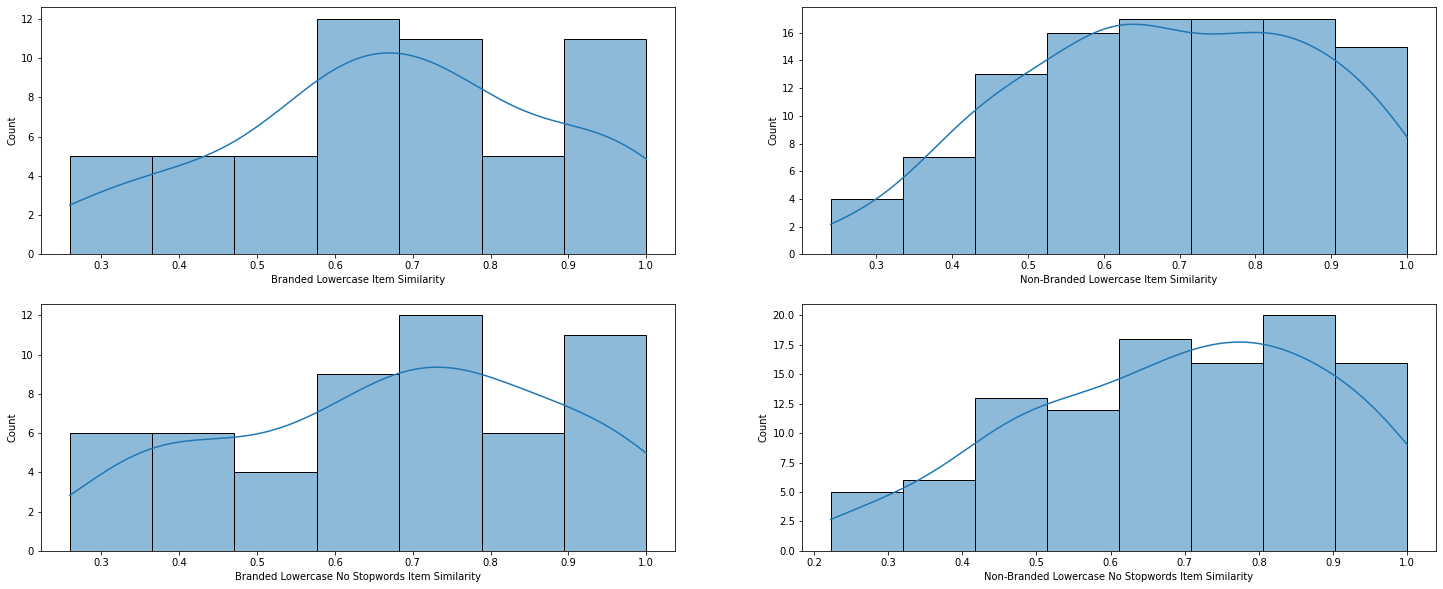

In [176]:
# Plot the distribution of our four models listed above
fig, axes = plt.subplots(2, 2, figsize=(25,10))
sns.histplot(x=rcs_costco['lowercase_item_similarity'], kde=True, ax=axes[0,0]);
axes[0,0].set(xlabel='Branded Lowercase Item Similarity');

sns.histplot(x=stripped_rcs_costco['lowercase_item_similarity'], kde=True, ax=axes[0,1]);
axes[0,1].set(xlabel='Non-Branded Lowercase Item Similarity');

sns.histplot(x=rcs_costco['no_sw_item_similarity'], kde=True, ax=axes[1,0]);
axes[1,0].set(xlabel='Branded Lowercase No Stopwords Item Similarity');

sns.histplot(x=stripped_rcs_costco['no_sw_item_similarity'], kde=True, ax=axes[1,1]);
axes[1,1].set(xlabel='Non-Branded Lowercase No Stopwords Item Similarity');


Based on these distributions, it would seem that the "non-branded" data is more accurate especially when looking at the case where stopwords have been removed.   

However, we must think about the fact that we just compared sentences and not whether or not they are an actual match because we do not know the ground truth. Therefore, we must go back and enter whether there is a match (1) or not (0) and compare which model best predicted a match.

## Comparing Matches 

Here we will compare all 4 models to the ground truth to see which model had the best predictability. 

First, extract dfs to CSV to create column of match (1) vs no match (0).  

Rules for whether match (1) or not (0), must be same brand and product unless "Kirkland" specific then "President Choice" brand is accepted. Reason for this is because both are only specific to their companies so they should be selling at approximately the same price ("house" price).

In [177]:
rcs_costco.to_csv('/Users/anjawu/Code/real-canadian-superstore/rcs_costco_df.csv')
stripped_rcs_costco.to_csv('/Users/anjawu/Code/real-canadian-superstore/stripped_rcs_costco_df.csv')

Import new CSVs with ground truth about whether entries from two stores are matches:

In [182]:
rcs_costco_df_matches = pd.read_csv('/Users/anjawu/Code/real-canadian-superstore/rcs_costco_df_matches.csv')
stripped_rcs_costco_df_matches = pd.read_csv('/Users/anjawu/Code/real-canadian-superstore/stripped_rcs_costco_df_matches.csv')

Compare amount of matching values:

In [197]:
rcs_costco_df_matches['matches'].value_counts(normalize=True)

1    0.814815
0    0.185185
Name: matches, dtype: float64

In [198]:
stripped_rcs_costco_df_matches['matches'].value_counts(normalize=True)

0    0.603774
1    0.396226
Name: matches, dtype: float64

As can be seen, the branded search gives us a significantly higher percentage of correct matches (81%) compared to the non-branded search (40%). As a reminder the branded one returns a bit under twice less than the non-branded one (54 items versus 106 items), but is a bit more than twice better in getting correct matches.

# Run t-test to see if there is statistically significant difference in accuracy of matches. p1 = 0.81, p2 = 0.4, n1 = 54, n2 = 106. Check conditions of t-test to see if valid to run it.

#### From the previous analysis we can conclude that the best model for matches is branded! So we will create a dataframe that contains just the matched (1) items for both RCS and Costco (matched_rcs_costco)! This is the one we will be using to compare prices between the two stores.

### Removing incorrect hits
Here we will remove the rows that were not matches from our best model (found in previous step)

In [293]:
matched_rcs_costco = rcs_costco_df_matches[rcs_costco_df_matches['matches']==1].reset_index()
matched_rcs_costco = matched_rcs_costco.drop(columns=['Unnamed: 0','index'])

not_matched_rcs_costco = rcs_costco_df_matches[rcs_costco_df_matches['matches']==0].reset_index()
not_matched_rcs_costco = not_matched_rcs_costco.drop(columns=['Unnamed: 0','index'])

Look at the distribution of percentages of sentence similarities based on matches vs no match, due to curiosity. 

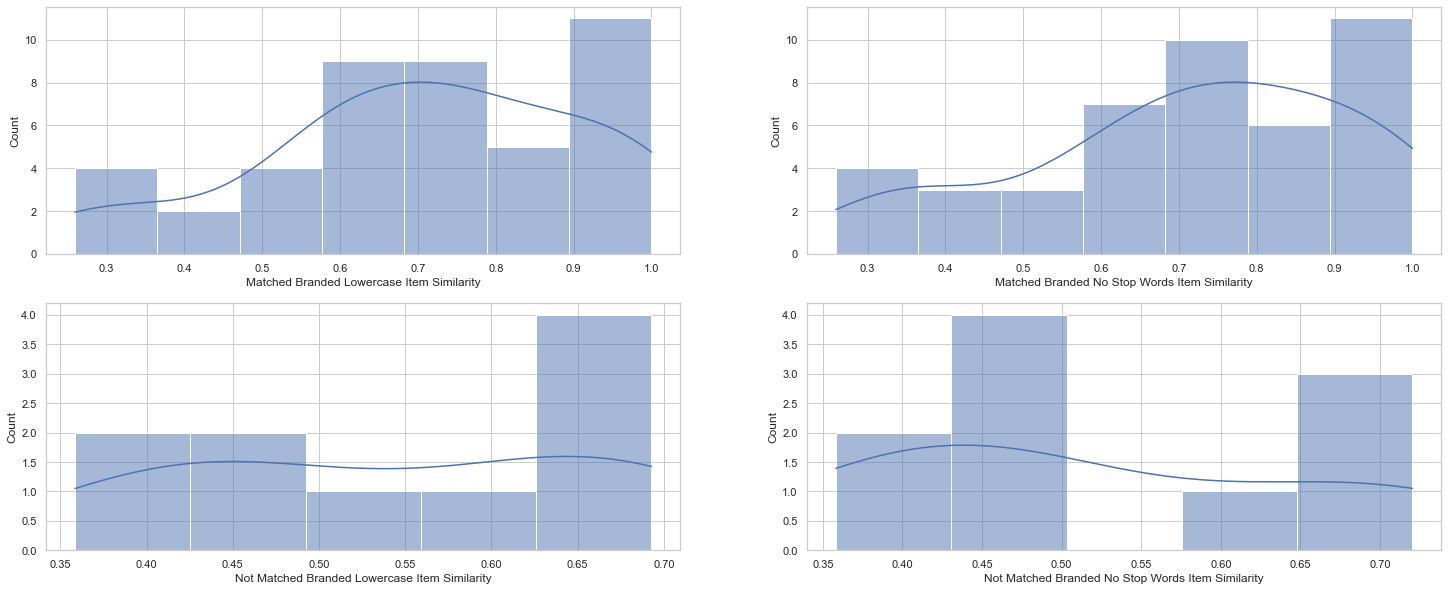

In [294]:
fig, axes = plt.subplots(2, 2, figsize=(25,10))

sns.histplot(x=matched_rcs_costco['lowercase_item_similarity'], kde=True, ax=axes[0,0]);
axes[0,0].set(xlabel='Matched Branded Lowercase Item Similarity');

sns.histplot(x=matched_rcs_costco['no_sw_item_similarity'], kde=True, ax=axes[0,1]);
axes[0,1].set(xlabel='Matched Branded No Stop Words Item Similarity');

sns.histplot(x=not_matched_rcs_costco['lowercase_item_similarity'], kde=True, ax=axes[1,0]);
axes[1,0].set(xlabel='Not Matched Branded Lowercase Item Similarity');

sns.histplot(x=not_matched_rcs_costco['no_sw_item_similarity'], kde=True, ax=axes[1,1]);
axes[1,1].set(xlabel='Not Matched Branded No Stop Words Item Similarity');

The data shows that there is a larger range for matched item similarity (below 0.3 all the way to 1.0), with and without stop words. This implies that there is not much of a point for searching on the Real Canadian Superstore with either of these methods as it does not yield consistent results. 

----

## Comparing prices for Costco and Real-Canadian Superstore

Now that we have looked at which model gives us the most accurate and largest set and we have filtered out only the matches, we can now compare the prices from the two stores to see which one is a better deal.

1) Look at number of prices for Costco that are lower than RCS   
2) Find percentage of prices that are lower   
3) Look at distribution of prices for (double bar graph) to see spread of two company differences   
4) Can I quantify the numerical difference in prices in a meaningful way to show the difference between the two companies? Maybe do mean spread of data difference.

Change the formating of the price columns to be float:

In [580]:
# range of both the RCS and Costco prices will be the same 
range_list = len(matched_rcs_costco)

# create lists to store the float (converted string without "$")
new_rcs_price_flt = []
new_costco_price_flt = []

# cycle through the two columns for both the RCS and Costco prices to remove "$" and convert to float
for i in range(range_list):
     new_rcs_price_flt.append(float(matched_rcs_costco['RCS-Price'][i].lstrip('$')))
     new_costco_price_flt.append(float(matched_rcs_costco['Costco-Price'][i].lstrip('$')))
        
# create new columns to store the new form of value
matched_rcs_costco['RCS-Price_flt'] = new_rcs_price_flt
matched_rcs_costco['Costco-Price_flt'] = new_costco_price_flt

We look at the number values where Costco's prices are lower:

In [332]:
matched_rcs_costco['RCS-Price_flt'].index

RangeIndex(start=0, stop=44, step=1)

In [321]:
rcs_column = matched_rcs_costco['RCS-Price_flt']
costco_column = matched_rcs_costco['Costco-Price_flt']

# Get count of items where Costco was cheaper than RCS:
costco_column[costco_column < rcs_column].count()

12

In [323]:
rcs_column = matched_rcs_costco['RCS-Price_flt']
costco_column = matched_rcs_costco['Costco-Price_flt']

# Get count of values greater than 20 in the column 'C' 
rcs_column[costco_column >= rcs_column].count()

32

*This means out of 44 items only 12 of them are cheaper at Costco*

### This seemed odd to me, so I went and analyzed the matches and I noticed one thing right away. RCS is really great because it lists the products by comparing the unit price, however, Costco has no indication how much you are really getting for the price - unless you look at the photo of the product. 

I decided to export the matches I have and look up the 44 individual Costco products (which need unit prices) and enter a new column that includes this.

In [340]:
# export current matches to csv to create 2 columns for rcs and costco unit for each item 
# (based on looking at Costco's website and the scraped amounts for rcs)
matched_rcs_costco.to_csv('/Users/anjawu/Code/real-canadian-superstore/matched_rcs_costco_unitprice.csv')

In [350]:
# save editted CSV to dataframe and clean up the unnecessary columns to create a concise new dataframe
matched_rcs_costco_unitprice = pd.read_csv('/Users/anjawu/Code/real-canadian-superstore/matched_rcs_costco_unitprice.csv')
matched_rcs_costco_unitprice = matched_rcs_costco_unitprice.reset_index()
matched_rcs_costco_unitprice = matched_rcs_costco_unitprice.drop(columns=['Unnamed: 0','index'])

shortened_matched_rcs_costco_unitprice = matched_rcs_costco_unitprice.drop(columns=['Costco-Price','RCS-Price','RCS-Unit Price','RCS-Unit Measure','lowercase_Costco','lowercase_RCS','no_sw_Costco','no_sw_RCS','lowercase_item_similarity','no_sw_item_similarity','matches'])
# shortened_matched_rcs_costco_unitprice

In [402]:
unit_price_rcs = []
unit_price_costco = []

# create for loop to calculate the unit price for each item; be sure to check for NaN - if yes then just use price in "Price_flt" column:
for i in range(len(shortened_matched_rcs_costco_unitprice)):
    # if both the costco and rcs have values then calculate the unit price based on price and units given
    if (math.isnan(shortened_matched_rcs_costco_unitprice['costco_amount'][i]) == False) and (math.isnan(shortened_matched_rcs_costco_unitprice['rcs_amount'][i]) == False):
        rcs_unit_price = shortened_matched_rcs_costco_unitprice['RCS-Price_flt'][i]/shortened_matched_rcs_costco_unitprice['rcs_amount'][i]
        costco_unit_price = shortened_matched_rcs_costco_unitprice['Costco-Price_flt'][i]/shortened_matched_rcs_costco_unitprice['costco_amount'][i]
        
        unit_price_rcs.append(rcs_unit_price)
        unit_price_costco.append(costco_unit_price)
#         print(f'{i}) rcs is not NaN: {rcs_unit_price}, costco is not Nan: {costco_unit_price}')
        
    else:
        # if costco OR rcs are NaN for their units then take the whole price given from the websites for BOTH stores
        rcs_unit_price_null = shortened_matched_rcs_costco_unitprice['RCS-Price_flt'][i]
        costco_unit_price_null = shortened_matched_rcs_costco_unitprice['Costco-Price_flt'][i]
        
        unit_price_rcs.append(rcs_unit_price_null)
        unit_price_costco.append(costco_unit_price_null)
#         print(f'{i}) rcs: {rcs_unit_price_null}, costco: {costco_unit_price_null}')
    
# create columns to store the unit prices per store
shortened_matched_rcs_costco_unitprice['RCS_unit_price'] = unit_price_rcs
shortened_matched_rcs_costco_unitprice['Costco_unit_price'] = unit_price_costco

shortened_matched_rcs_costco_unitprice


,Costco-Item,RCS-Brand,RCS-Item,RCS-Price_flt,rcs_amount,Costco-Price_flt,costco_amount,RCS_unit_price,Costco_unit_price
0,Salton glass kettle,NaN,Salton - 1.5 L Cordless Glass Kettle,62.33,NaN,34.99,NaN,62.330000,34.990000
1,Gillette Fusion ProGlide Power,Gillette,Fusion Proglide Cartridges Microcomb,44.99,NaN,49.99,NaN,44.990000,49.990000
2,Tide Pods with Downy laundry detergent,Tide,"With Downy, Liquid Laundry Detergent Pods, Apr...",23.99,61.0,20.99,104.0,0.393279,0.201827
3,Tide HE liquid laundry detergent,Tide,"Tide Liquid Laundry Detergent, Original, 80 lo...",19.99,3388.0,18.99,4870.0,0.005900,0.003899
4,Lindt Lindor assorted chocolates,Lindt,"Chocolate, Lindor Assorted Truffles",9.99,240.0,17.49,900.0,0.041625,0.019433
5,Webber Naturals triple strength Omega-3,Webber Naturals,"Omega-3, Triple Strength",16.11,81.0,23.99,200.0,0.198889,0.119950
6,Jamieson probiotic,Jamieson,Probiotic 5 Billion,16.49,72.0,23.99,135.0,0.229028,0.177704
7,Jamieson B100 complex timed-release vitamins,Jamieson,"B100 Complex 100mg, Timed Release",22.99,121.0,20.99,200.0,0.190000,0.104950
8,Lorex 8 channel DVR camera system,NaN,Lorex wireless security system with 4 cameras,274.99,NaN,399.99,NaN,274.990000,399.990000
9,Starbucks Caffè Verona\nwhole-bean coffee,Starbucks,"Caffè Verona Capsules, Ground Coffee For Nespr...",9.99,100.0,17.99,1130.0,0.099900,0.015920


Looking at the count for the number of Costco products that are cheaper than RCS:

In [392]:
rcs_column = shortened_matched_rcs_costco_unitprice['RCS_unit_price']
costco_column = shortened_matched_rcs_costco_unitprice['Costco_unit_price']

# Get count of items where Costco was cheaper than RCS:
costco_column[costco_column < rcs_column].count()

36

In [393]:
rcs_column = shortened_matched_rcs_costco_unitprice['RCS_unit_price']
costco_column = shortened_matched_rcs_costco_unitprice['Costco_unit_price']

# Get count of items where Costco was cheaper than RCS:
costco_column[costco_column > rcs_column].count()

8

In [398]:
# percent of times that costco is cheaper
costco_column[costco_column < rcs_column].count()/len(shortened_matched_rcs_costco_unitprice)

0.8181818181818182

**Costco has 36 items that are cheaper than RCS out of 44 items. This means that 82% of the items are cheaper than Costco.**

### It is great to see that Costco is cheaper majority of the time, but for Costco you have to pay a annual fee to shop there. So I was curious if I could quanitify how much cheaper Costco is. If it was just very slightly cheaper, it still would be more worth it to shop at RCS. So we will look at the distribution of the price differences.

In [406]:
# create column that calculates the price differences for all items (Costco price - RCS price)
# positive means that Costco is more expensive, and negative means Costco is cheaper
price_diff = []

for i in range(len(shortened_matched_rcs_costco_unitprice)):
    price_diff.append(shortened_matched_rcs_costco_unitprice['Costco_unit_price'][i] - shortened_matched_rcs_costco_unitprice['RCS_unit_price'][i])
    
    
shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'] = price_diff
# shortened_matched_rcs_costco_unitprice

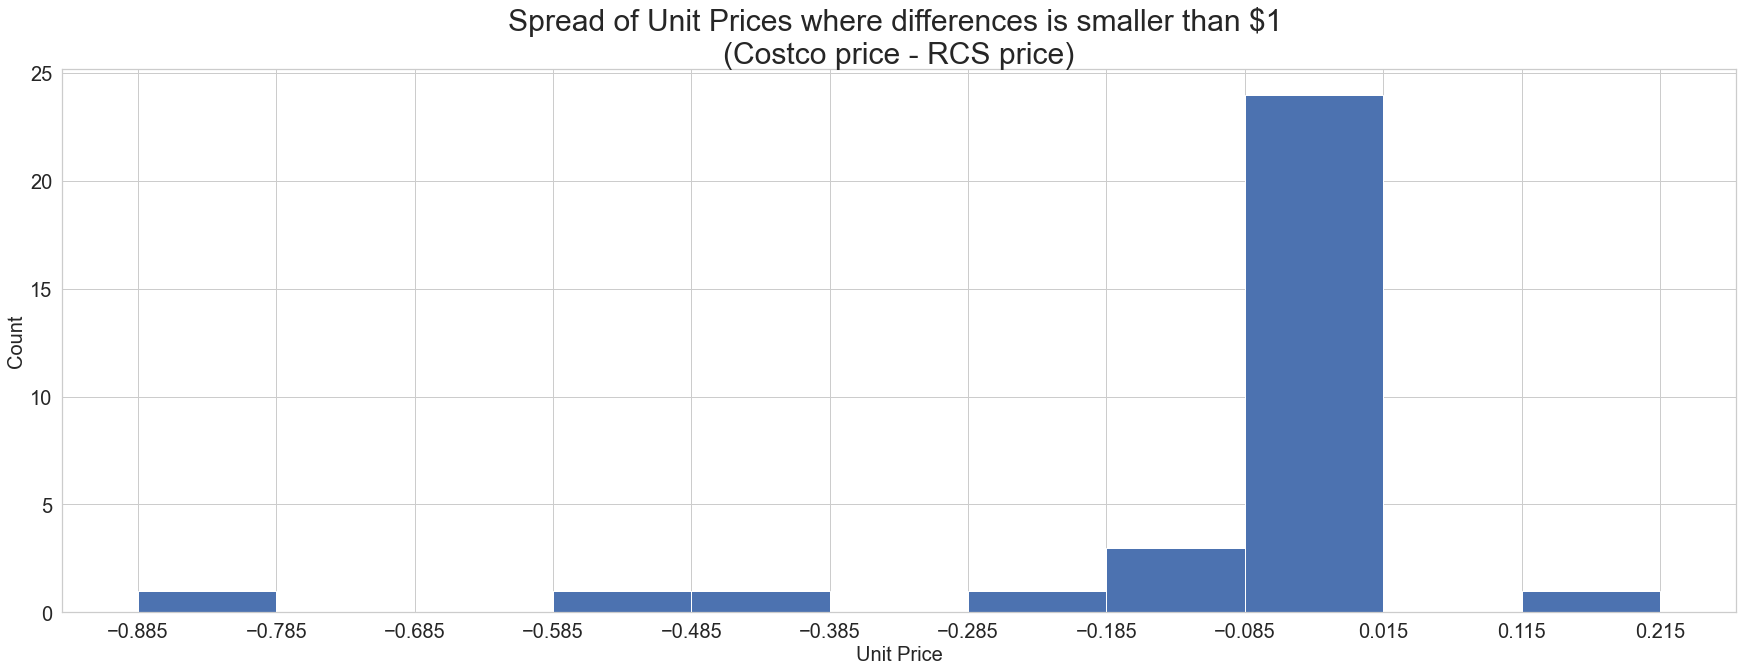

In [459]:
# create two bar charts, one that shows the spread of unit prices (less than 1$) and one that shows the item price difference (more than $1)
range_smaller_1 = shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'].between(-1,1, inclusive='neither')
tick_list = np.arange(min(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][range_smaller_1]), max(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][range_smaller_1])+w,w)
w = 0.1

plt.figure(figsize=(30,10))

plt.hist(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][range_smaller_1], bins=np.arange(min(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][range_smaller_1]), max(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][range_smaller_1]) + w, w));
plt.title('Spread of Unit Prices where differences is smaller than $1 \n(Costco price - RCS price)', fontsize = 30)
plt.xlabel('Unit Price', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(ticks= tick_list, fontsize=20)
plt.yticks(fontsize=20);



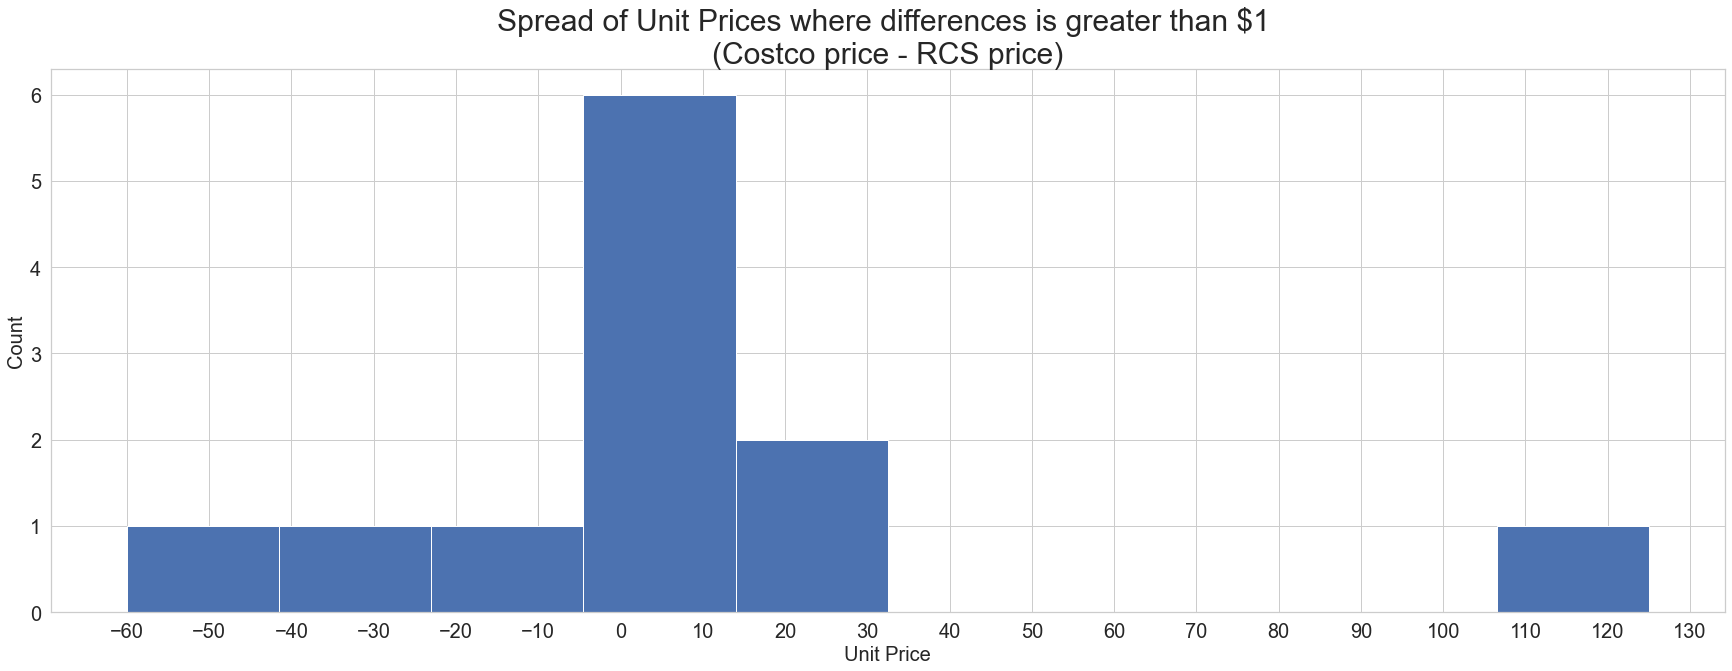

In [496]:
list_of_index = []
list_of_index = shortened_matched_rcs_costco_unitprice[shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff']<=-1].index.tolist()
list_of_index += shortened_matched_rcs_costco_unitprice[shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff']>=1].index.tolist()

tick_list = np.arange(min(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][list_of_index]), max(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][list_of_index])+w,w)
w = 10

plt.figure(figsize=(30,10))

plt.hist(shortened_matched_rcs_costco_unitprice['Costco-RCS_price_diff'][list_of_index])
plt.title('Spread of Unit Prices where differences is greater than $1 \n(Costco price - RCS price)', fontsize = 30)
plt.xlabel('Unit Price', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(ticks= tick_list, fontsize=20)
plt.yticks(fontsize=20);


I did not feel like the one for less than a $1 difference was very clear, so I decided to change the way I looked at it by finding the average units sold at Costco and multiplying the unit price by the same units for both stores to make it more comparable.

In [561]:
mean_rcs_price = []
mean_costco_price = []

for i in range(len(shortened_matched_rcs_costco_unitprice)):
    # we want to mutiply the unit price per store by the costco unit amount to be able to equate the amount to determine a quantifiable difference
    if math.isnan(shortened_matched_rcs_costco_unitprice['costco_amount'][i]) == False:
        mean_rcs_price.append(shortened_matched_rcs_costco_unitprice['RCS_unit_price'][i]*shortened_matched_rcs_costco_unitprice['costco_amount'][i]) 
        mean_costco_price.append(shortened_matched_rcs_costco_unitprice['Costco_unit_price'][i]*shortened_matched_rcs_costco_unitprice['costco_amount'][i]) 
        
    # if we have a null in the unit price, it means it is either 1 unit, or we were not given enough information, 
    # so we assume that the unit price will 1 and do not multiple the unit price by any value
    else:
        mean_rcs_price.append(shortened_matched_rcs_costco_unitprice['RCS_unit_price'][i])
        mean_costco_price.append(shortened_matched_rcs_costco_unitprice['Costco_unit_price'][i])        

# here we create columns from our lists to give us the price at each store using the Costco units and the store specific unit price
shortened_matched_rcs_costco_unitprice['mean_rcs_price_(costco_units)'] = mean_rcs_price
shortened_matched_rcs_costco_unitprice['mean_costco_price_(costco_units)'] = mean_costco_price
# now we want to calculate the price difference of the mean price:
shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'] = shortened_matched_rcs_costco_unitprice['mean_costco_price_(costco_units)'] - shortened_matched_rcs_costco_unitprice['mean_rcs_price_(costco_units)']

# shortened_matched_rcs_costco_unitprice


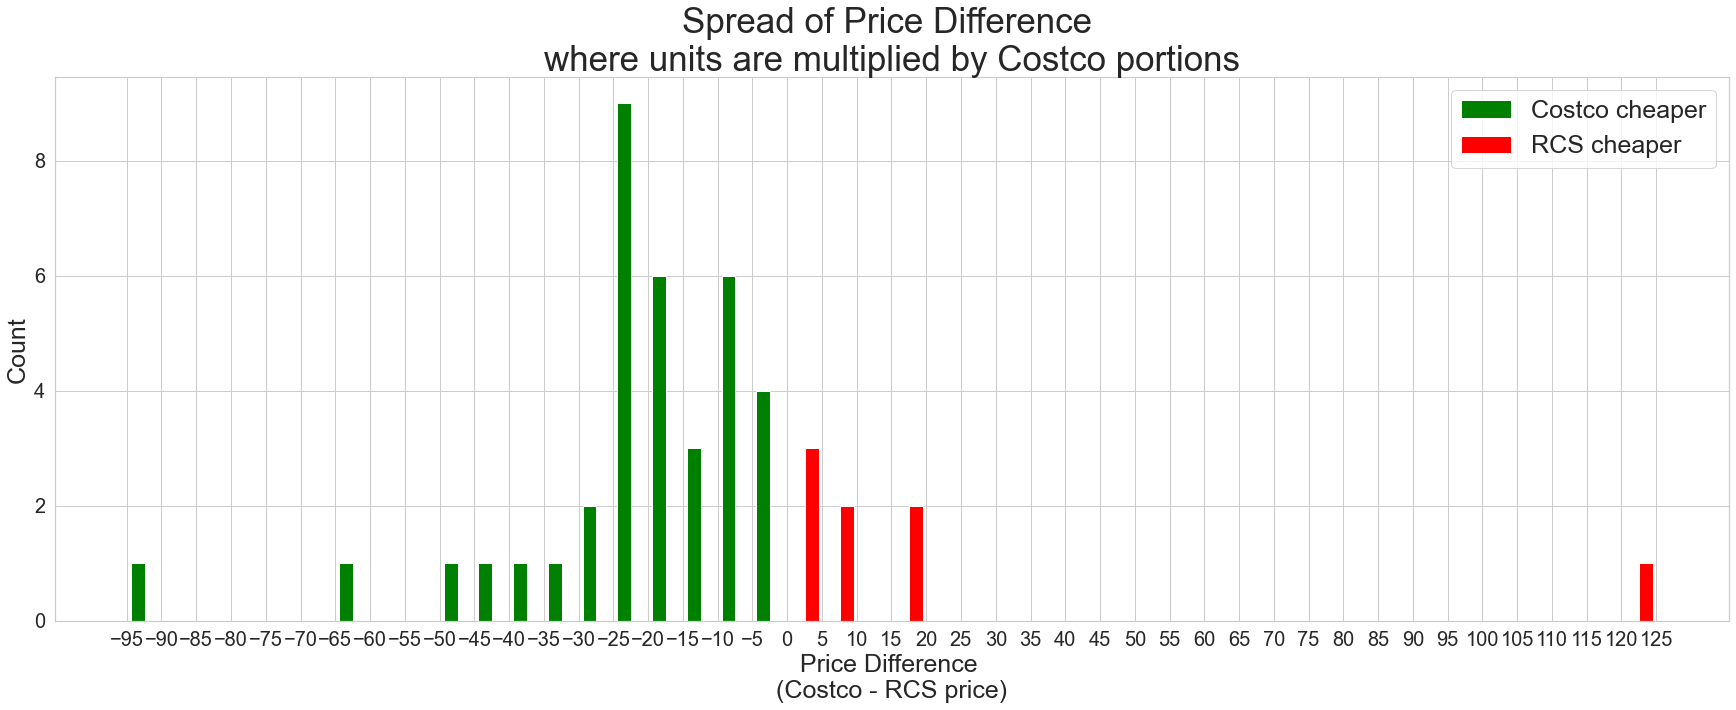

In [600]:
# I wanted to colour code my histogram by which store was cheaper (difference less than 0 and greater than 0)
# and since we are using a histogram, we need to have two dataframes if we want two colours.
less_than_zero = []
greater_than_zero = []

for i in range(len(shortened_matched_rcs_costco_unitprice)):
    # I included less than or equal to 0 for Costco being cheaper
    if (shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'][i] <= 0):
        less_than_zero.append(i)
    else:
        greater_than_zero.append(i)

# I wanted to have x-ticks at 5$ intervals, so I used np.arange to space them out evenly
tick_list = np.arange(min(round(shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'])), max(round(shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)']))+w, w)
w = 5

plt.figure(figsize=(30,10))

# created a histogram that had all the price differences given the costco units and store specific unit price
plt.hist(x = [shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'][less_than_zero], shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'][greater_than_zero]], bins=44, color = ['green', 'red'])
plt.title('Spread of Price Difference \nwhere units are multiplied by Costco portions', fontsize = 35)
plt.xlabel('Price Difference \n(Costco - RCS price)', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(ticks= tick_list, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Costco cheaper', 'RCS cheaper'], fontsize=25);


In [598]:
# mean of price difference when Costco is cheaper
statistics.mean(shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'][less_than_zero])

21.135285814466016

In [597]:
# mean of price difference when RCS is cheaper
statistics.mean(shortened_matched_rcs_costco_unitprice['mean_price_diff(costco_units)'][greater_than_zero])

23.449075

----

### Conclusion:

As can be seen, the majority of the spread of the unit price is negative, meaning that the Costco price is cheaper than the RCS (which was confirmed in our previous calculations). We can now see that the average price difference when either is cheaper is approximately the same, however, Costco is 81% more likely to be cheaper. This means that there is a significant savings at Costco. Which would mean that the membership is worth it - given if you shop the deals.

-----

# Extension:

**For fun look at the percent of price differences between the two stores for all matches for both stripped and branded dfs.**